In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('crime-housing-austin-2015.csv')

In [3]:
df.head()

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,...,81%,87%,100%,100%,89%,26%,44%,63%,$708,40%


In [4]:
dfa = df.rename(columns={"Zip_Code_Crime": "Zip Code"})

In [5]:
df2=pd.read_csv('AustinZipCodes.csv')

In [6]:
df2.head()

,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank
0,1,78705,"30.293474, -97.738268","Austin, Texas","26,825","11,008.66",#519
1,2,78751,"30.310819, -97.722821","Austin, Texas","14,005","5,822.28","#1,374"
2,3,78752,"30.331288, -97.704660","Austin, Texas","18,030","5,435.92","#1,528"
3,4,78741,"30.229845, -97.715136","Austin, Texas","40,661","5,346.47","#1,562"
4,5,78723,"30.305341, -97.683344","Austin, Texas","30,110","5,175.95","#1,640"


In [7]:
df2['People / Sq. Mile'] = df2['People / Sq. Mile'].str.replace(',', '').astype(float)
df2['Population'] = df2['Population'].str.replace(',', '').astype(float)

In [8]:
df2a = df2.astype({'Zip Code':'float32'})

In [9]:
dfb = dfa.merge(df2a, on=['Zip Code'])

In [10]:
dfb.head()

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location_x,Clearance_Status,Clearance_Date,District,Zip Code,...,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related,#,Location_y,City,Population,People / Sq. Mile,National Rank
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,40%,59%,$708,44%,12,"30.380366, -97.674764","Austin, Texas",44210.0,3973.96,"#2,350"
1,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,40%,59%,$708,44%,12,"30.380366, -97.674764","Austin, Texas",44210.0,3973.96,"#2,350"
2,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,40%,59%,$708,44%,12,"30.380366, -97.674764","Austin, Texas",44210.0,3973.96,"#2,350"
3,201510811,7.0,AGG ASLT STRANGLE/SUFFOCATE,Agg Assault,1-Jan-15,1225 DEXFORD DR,C,13-Jan-15,E,78753.0,...,40%,59%,$708,44%,12,"30.380366, -97.674764","Austin, Texas",44210.0,3973.96,"#2,350"
4,201511249,7.0,THEFT BY SHOPLIFTING,Theft,1-Jan-15,12900 N IH 35 SVRD SB,C,1-Jan-15,E,78753.0,...,40%,59%,$708,44%,12,"30.380366, -97.674764","Austin, Texas",44210.0,3973.96,"#2,350"


In [11]:
ZipCodeCounts = dfb.groupby(dfb['Zip Code']).agg({'Key':'count', 'People / Sq. Mile':'first'})
ZipCodeCounts2 = dfb.groupby(dfb['Zip Code']).agg({'Key':'count', 'Population':'first'})

In [12]:
ZipCodeCounts.sort_values(by=ZipCodeCounts.columns[1], inplace=True)
ZipCodeCounts2.sort_values(by=ZipCodeCounts2.columns[1], inplace=True)

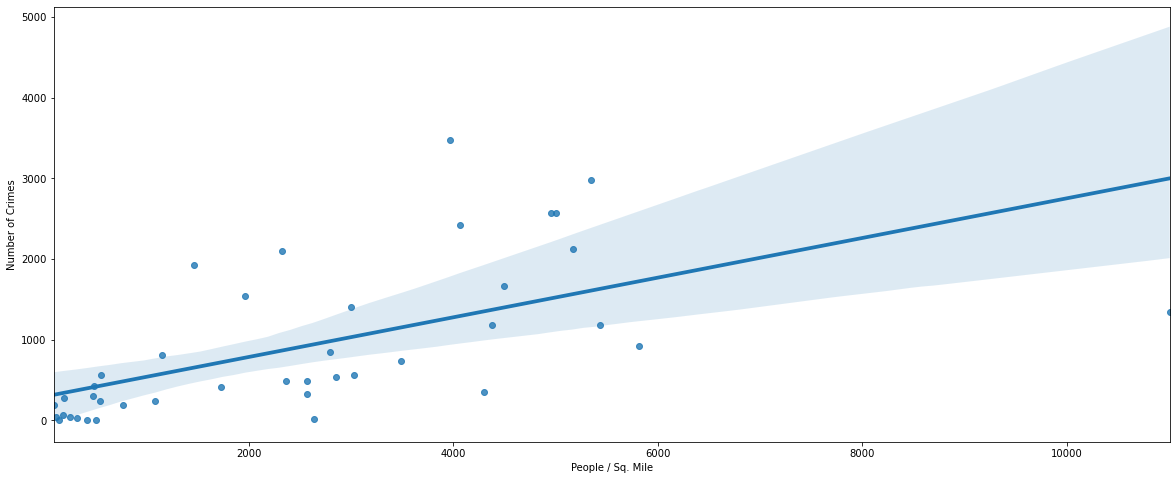

In [13]:
plt.figure(figsize=(20,8))
sns.set_context(rc={'lines.linewidth': 2.5})
myplot = sns.regplot(data=ZipCodeCounts, x='People / Sq. Mile', y='Key')
plt.ylabel('Number of Crimes')
plt.show()

In [14]:
myfig = myplot.get_figure()
myfig.savefig('pop_dens_Crimes.png')

In [15]:
stats.pearsonr(ZipCodeCounts['People / Sq. Mile'], ZipCodeCounts['Key'])

(0.5982091144601989, 3.6164286910014946e-05)

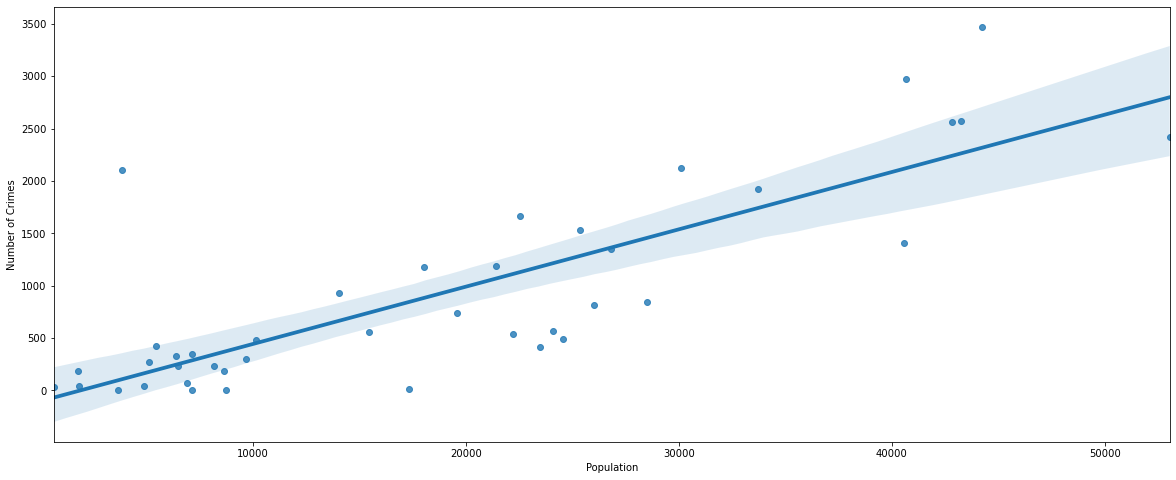

In [16]:
plt.figure(figsize=(20,8))
sns.set_context(rc={'lines.linewidth': 2.5})
myplot = sns.regplot(data=ZipCodeCounts2, x='Population', y='Key')
plt.ylabel('Number of Crimes')
plt.show()

In [17]:
myfig = myplot.get_figure()
myfig.savefig('pop_Crimes.png')

In [18]:
stats.pearsonr(ZipCodeCounts2['Population'], ZipCodeCounts2['Key'])

(0.8182212821233893, 6.454547056321682e-11)